In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE

df = pd.read_csv('/content/drive/MyDrive/EEG data/EEG_data.csv')

In [6]:
df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1, inplace=True)
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [7]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [8]:
pt = PowerTransformer()
X_pt = pt.fit_transform(X)

Applyin t-SNE:

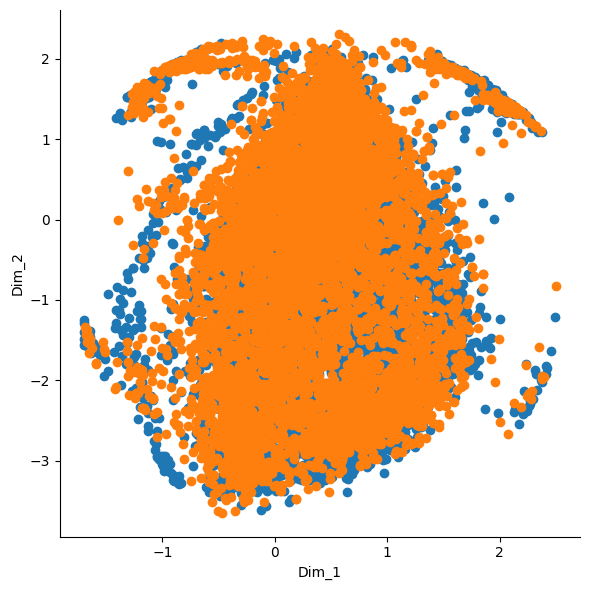

In [9]:
data = X_pt

labels = y

model = TSNE(n_components=2, random_state=0, perplexity=8000, n_iter=3000)

tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2')
plt.show()